In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


Las partes negras corresponten a caracteristicas eliminadas


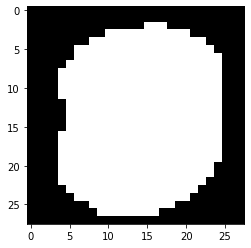


Las partes negras corresponten a caracteristicas eliminadas


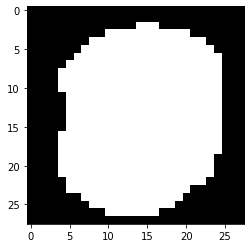

x_train shape: (60000, 444)
x_test shape: (10000, 444)


In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.reshape(x_train,[60000,784])
x_test = np.reshape(x_test,[10000,784])

sel = VarianceThreshold(threshold=(0.01))
sel.fit_transform(x_train)
array = sel.get_support()
print('\nLas partes negras corresponten a caracteristicas eliminadas')
plt.imshow(array.reshape(28,28), cmap='gray')
plt.show()


sel.fit(x_train)
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

#poly = PolynomialFeatures(1)
#x_train= poly.fit_transform(x_train) 
#print("x_train shape:", x_train.shape)

In [ ]:
#x_train = np.resize(x_train, [60000, 484])
#x_test = np.resize(x_test, [60000, 484])

#x_train = np.resize(x_train, [60000, 22, 22])
#x_test = np.resize(x_test, [60000, 22, 22])

#print(x_train.shape, "train samples")
#print(x_test.shape, "test samples")

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Model / data parameters
num_classes = 10
input_shape = (444, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 444, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=(3), activation="relu"),
        layers.MaxPooling1D(pool_size=(3)),
        layers.Conv1D(64, kernel_size=(3), activation="relu"),
        layers.MaxPooling1D(pool_size=(3)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 442, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 147, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 145, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [ ]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time.time()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end = time.time()

Epoch 1/25
422/422 [==============================] - 24s 56ms/step - loss: 0.3929 - accuracy: 0.8790 - val_loss: 0.1239 - val_accuracy: 0.9625
Epoch 2/25
422/422 [==============================] - 24s 56ms/step - loss: 0.1754 - accuracy: 0.9465 - val_loss: 0.0982 - val_accuracy: 0.9730
Epoch 3/25
422/422 [==============================] - 23s 55ms/step - loss: 0.1419 - accuracy: 0.9551 - val_loss: 0.0805 - val_accuracy: 0.9773
Epoch 4/25
422/422 [==============================] - 23s 55ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.0807 - val_accuracy: 0.9780
Epoch 5/25
422/422 [==============================] - 23s 55ms/step - loss: 0.1078 - accuracy: 0.9656 - val_loss: 0.0815 - val_accuracy: 0.9782
Epoch 6/25
422/422 [==============================] - 24s 56ms/step - loss: 0.0980 - accuracy: 0.9696 - val_loss: 0.0824 - val_accuracy: 0.9785
Epoch 7/25
422/422 [==============================] - 23s 56ms/step - loss: 0.0904 - accuracy: 0.9712 - val_loss: 0.0681 - val_accuracy:

In [ ]:
score_test = model.evaluate(x_test, y_test, verbose=0)
score_train = model.evaluate(x_train, y_train, verbose=0)
outputs = model.predict(x_test)

for output in outputs:
  print(np.argmax(output), end='')

print("")
print("Error sobre el conjunto de prueba:", (1-score_test[1])*100)
print("Error sobre el conjunto de entrenamiento:", (1-score_train[1])*100)
print("Tiempo de entrenamiento: "+str(round(end - start,2)))
print("Epoch:", epochs)

7210414959069015973496654074013134727121174235124463556041957893746430702917329776278473613693141769605499219487397444925476790585665781016467317182069955156034465465451447232718181850892501110905164236111395294593903655722712841733887922415987230642419577282685779181803019941821297592641582920400284712402743300319652597930420711215339786361381051315561851794622506563720885411403376162192861952544283824503177579719214292049148184598837600302064933323912680566638827589618412591975408991052378940639521313657422632654897130383193446421825488400232710874479690980460635483393337802717065438096380996868578602402231975208462679329822927359180205613767125803784091867743491951739769133833672858511443107707944855408210845040617326726931462542062173410543117499984024511647194241553831456894193803251283440883317359632613607217142421796112481774807313107703552766928352256082928888749506632132293005781446029147473988471212232323917403558632676632791175649513347891169144540622315120381267162390122089